In [3]:
import matplotlib.pyplot as plt

In [18]:
time_series = [12, 21,1,2,2,3,4,21,13,24,120,21,4,5,18,13,14,16,17,18,20,40,50, 64, 10, 5,5,5,0,0,0,0,0,0,0]
print(len(time_series))

35


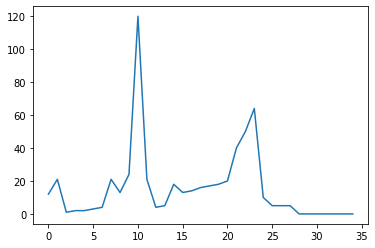

In [19]:
plt.plot(time_series)

# Resample

In [39]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.signal import resample

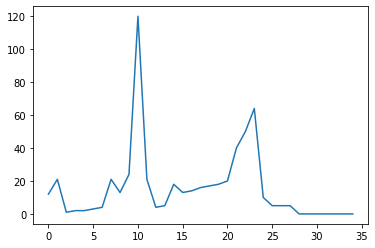

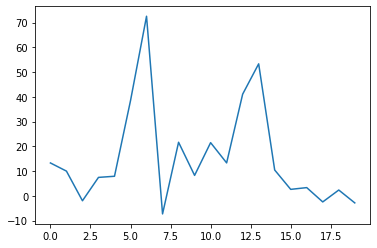

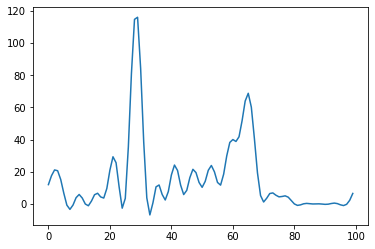

In [54]:
t0 = time_series
plt.plot(t0)
plt.show()

t1 = resample(time_series, 20)
plt.plot(t1)
plt.show()

t2 = resample(time_series, 100)
plt.plot(t2)

In [47]:
def resample_interpolate(x, n_samples):
    f = interp1d(range(len(x)), x)
    x_new = np.linspace(0, len(x)-1, n_samples)
    return f(x_new)

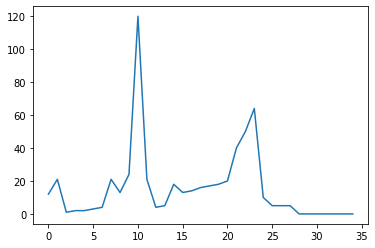

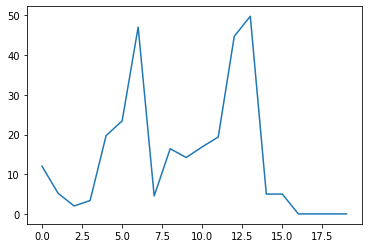

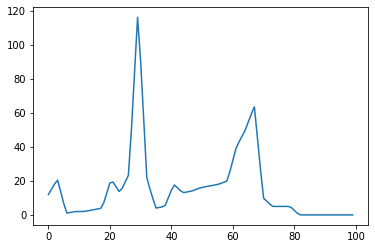

In [55]:
t0 = time_series
plt.plot(t0)
plt.show()

t1 = resample_interpolate(time_series, 20)
plt.plot(t1)
plt.show()

t2 = resample_interpolate(time_series, 100)
plt.plot(t2)

In [59]:
def resample_duplicate(x, n_samples):
    x = np.array(x)
    n_samples_org = len(x)
    if n_samples > n_samples_org and n_samples % n_samples_org == 0:
        n_times = n_samples // n_samples_org
        indices = np.array([[i for _ in range(n_times)] for i in range(n_samples_org)]).flatten()
        res = [x[i] for i in indices]
    elif n_samples > n_samples_org and n_samples % n_samples_org != 0:
        n_times = n_samples // n_samples_org + 1
        indices = np.array([[i for _ in range(n_times)] for i in range(n_samples_org)]).flatten()
        indices = [indices[int(j)] for j in np.linspace(0, len(indices) - 1, n_samples)]
        res = [x[i] for i in indices]
    elif n_samples <= n_samples_org and n_samples_org % n_samples == 0:
        sectioned_arr = np.array_split(x, n_samples)
        res = np.array([item.mean() for item in sectioned_arr])
    else:
        value_space = np.arange(0, n_samples_org * n_samples)
        output_index = value_space // n_samples_org
        input_index = value_space // n_samples
        uniques, n_uniques = np.unique(output_index, return_counts=True)
        res = [x[indices].sum() / n_samples_org for indices in
               np.split(input_index, n_uniques.cumsum())[:-1]]

    return res


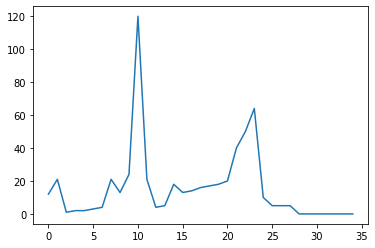

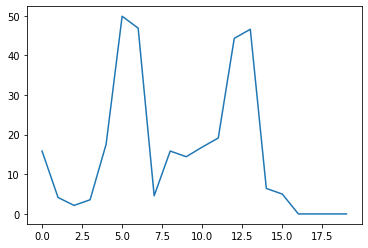

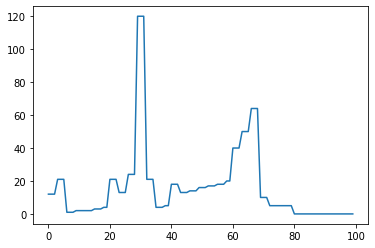

In [60]:
t0 = time_series
plt.plot(t0)
plt.show()

t1 = resample_duplicate(time_series, 20)
plt.plot(t1)
plt.show()

t2 = resample_duplicate(time_series, 100)
plt.plot(t2)

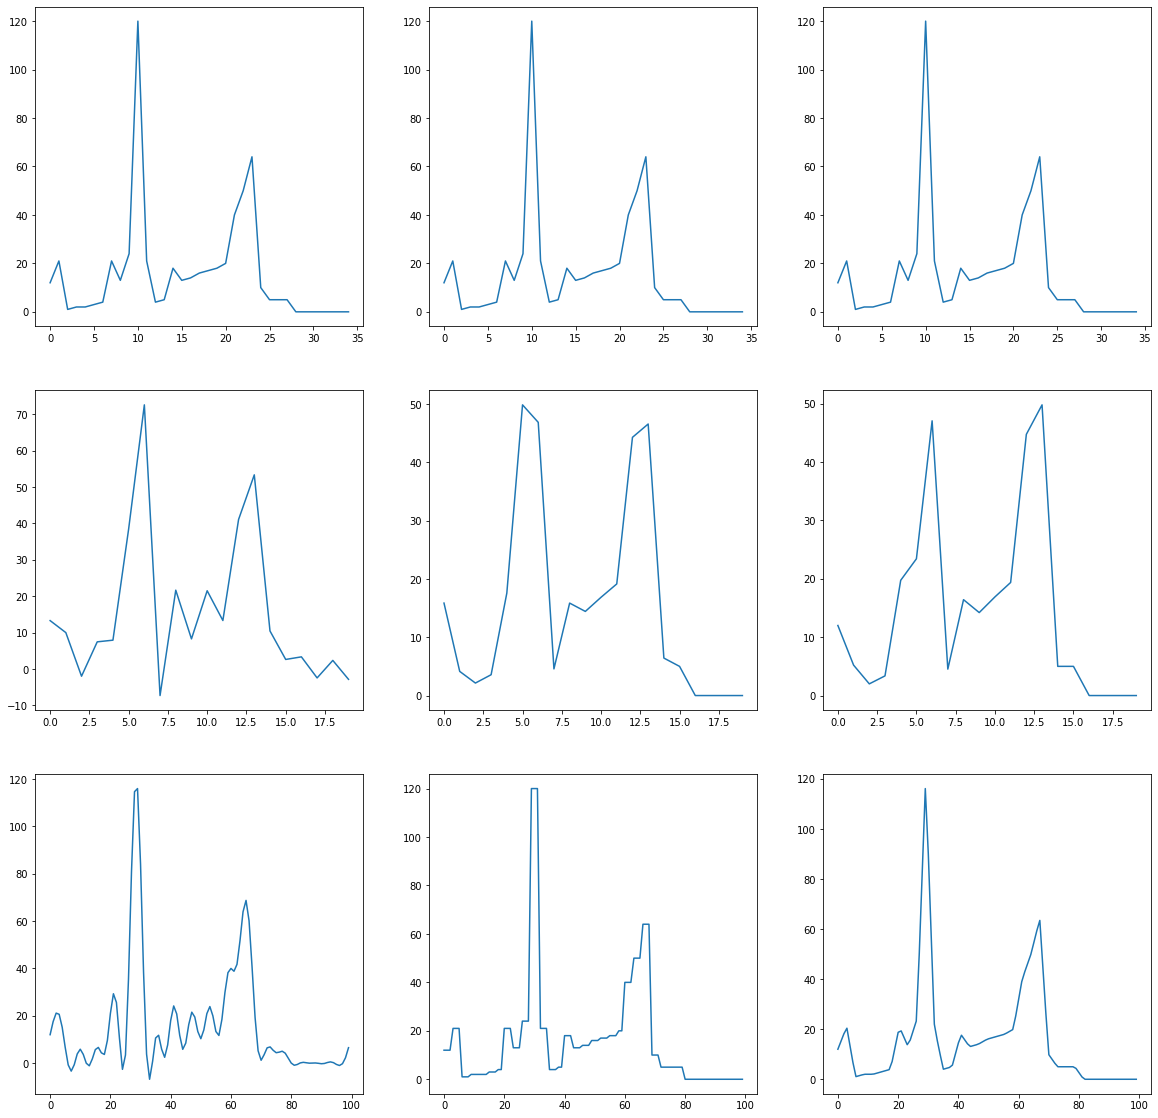

In [66]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 3, 1)
plt.plot(t0)
plt.subplot(3, 3, 2)
plt.plot(t0)
plt.subplot(3, 3, 3)
plt.plot(t0)

n_samples = 20
plt.subplot(3, 3, 4)
plt.plot(resample(t0, n_samples))
plt.subplot(3, 3, 5)
plt.plot(resample_duplicate(t0, n_samples))
plt.subplot(3, 3, 6)
plt.plot(resample_interpolate(t0, n_samples))

n_samples = 100
plt.subplot(3, 3, 7)
plt.plot(resample(t0, n_samples))
plt.subplot(3, 3, 8)
plt.plot(resample_duplicate(t0, n_samples))
plt.subplot(3, 3, 9)
plt.plot(resample_interpolate(t0, n_samples))

plt.show()
